In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *

In [3]:
'.asdf'.split('.')

['', 'asdf']

In [33]:
base_folder = '/home/jmc678/covid_data/group-testing/notebooks/pnas_paper_figs/contour_plot_sims_1620271939/'


def get_sim_output_fnames():
    return [base_folder + fname for fname in os.listdir(base_folder)]


def map_fpath_to_params(fpath):
    fname = fpath.split('/')[-1]
    
    # I got the parameter names / labels mixed up when generating the file names, whoops
    
    x_idx = int(fname.split('test_mult_')[1].split('_')[0])
    
    test_mult = float(fname.split('x_axis_point_idx_')[-1].split('.dill')[0])
    
    return test_mult, x_idx


def get_Y_values(test_mult_values):
    return np.array(sorted(list(set(test_mult_values))))

def get_X_values():
    # based on hardcoded values: lb=-1.1, ub = 1.1, npoints=13
    return np.linspace(-1.1, 1.1, 13)


from math import log
def load_contour_plot_data():
    sim_fpaths = get_sim_output_fnames()
    sim_results_df = load_sim_output(sim_fpaths)
    sim_params = {'test_mult': [], 'x_idx': []}
    for fpath in sim_fpaths:
        params = map_fpath_to_params(fpath)
        sim_params['test_mult'].append(params[0])
        sim_params['x_idx'].append(params[1])

    assert(len(set(sim_params['test_mult'])) == len(set(sim_params['x_idx'])) == 13)

    Y = get_Y_values(sim_params['test_mult'])
    X = get_X_values()

    test_mult_to_idx = {y_val:idx for idx, y_val in enumerate(Y)}

    Z = np.zeros((13, 13))

    for sim_idx in range(sim_results_df.shape[0]):

        x_idx = sim_params['x_idx'][sim_idx]
        y_idx = test_mult_to_idx[sim_params['test_mult'][sim_idx]]

        Z[x_idx, y_idx] = (sim_results_df.iloc[sim_idx]['res_cornell_inf_50'])
    
    return X, Y, Z



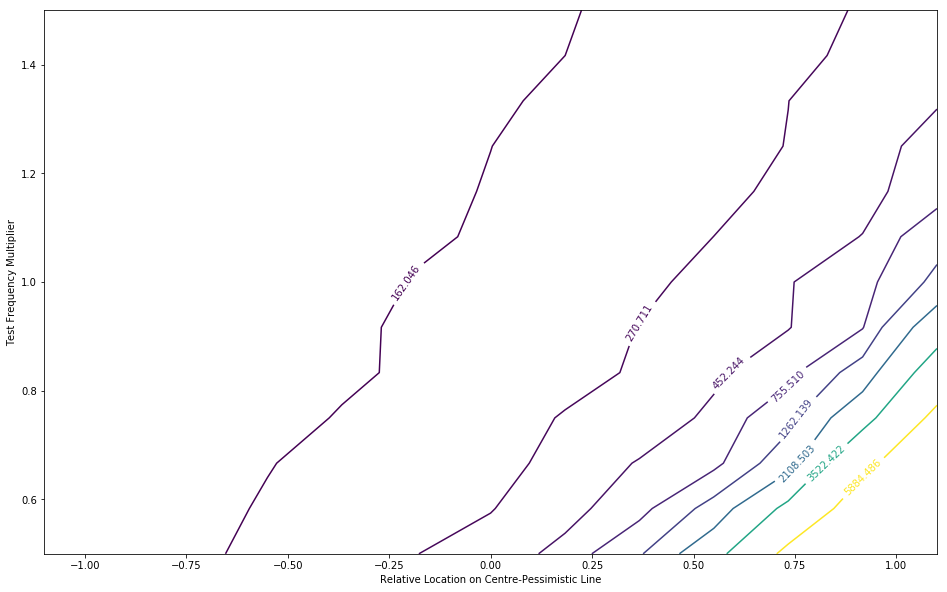

In [46]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

X,Y,Z = load_contour_plot_data()



plt.figure(figsize=(16,10))
plt.ylabel('Test Frequency Multiplier')
plt.xlabel('Relative Location on Centre-Pessimistic Line')
levels = np.logspace(log(Z.min())/log(10), log(Z.max())/log(10), num=10)
CS = plt.contour(X,Y,Z.T, levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()



In [13]:
sim_results_df.shape

(169, 28)